In [10]:
import sys, traceback
import cv2
import os
import re
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv
import glob
import os

In [39]:
# images = [cv2.imread(file) for file in glob.glob('../resources/Plant_leave_diseases_dataset_with_augmentation/*/*')]
# len(images)

In [50]:
img_dic = []

for directory in glob.glob('../resources/Plant_leave_diseases_dataset_with_augmentation/*'):
    images = glob.glob(directory + '/*')
    cat = os.path.basename(directory)
    split = cat.split('___')
    if len(split) == 2:
        name, status = split
    else:
        name, status = cat, None
    img_dic.append({
        'img':images,
        'len':len(images),
        'name': name,
        'full_name': cat,
        'status': status,
        'path':directory
    })

In [51]:
import re
import pandas as pd

df = pd.DataFrame.from_dict(img_dic)

<AxesSubplot:ylabel='full_name'>

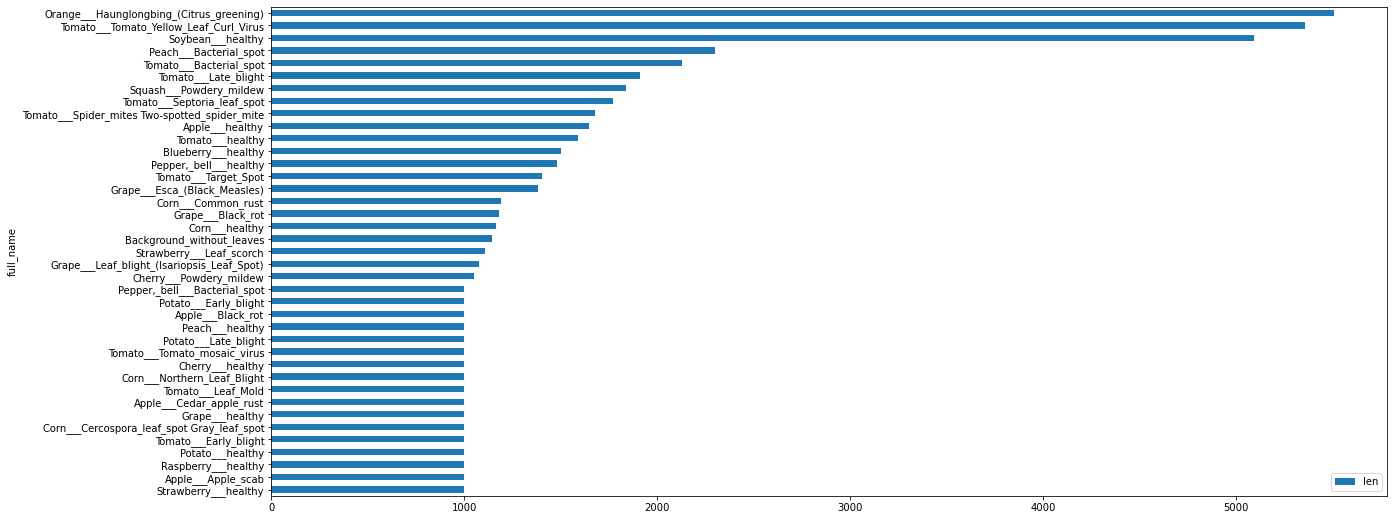

In [61]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,9)
df=df.sort_values(by=['len'])
df.plot.barh(x='full_name', y='len')

<AxesSubplot:ylabel='name'>

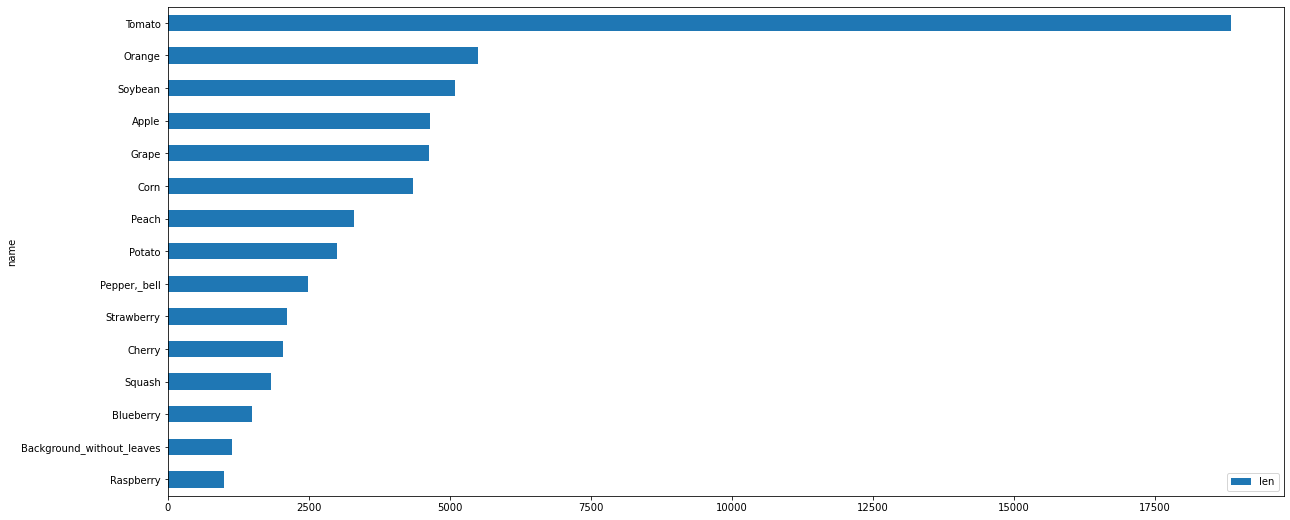

In [73]:
groups = df.groupby(['name']).sum().sort_values(by=['len'])
groups.plot.barh( y='len', use_index=True)

<AxesSubplot:ylabel='status'>

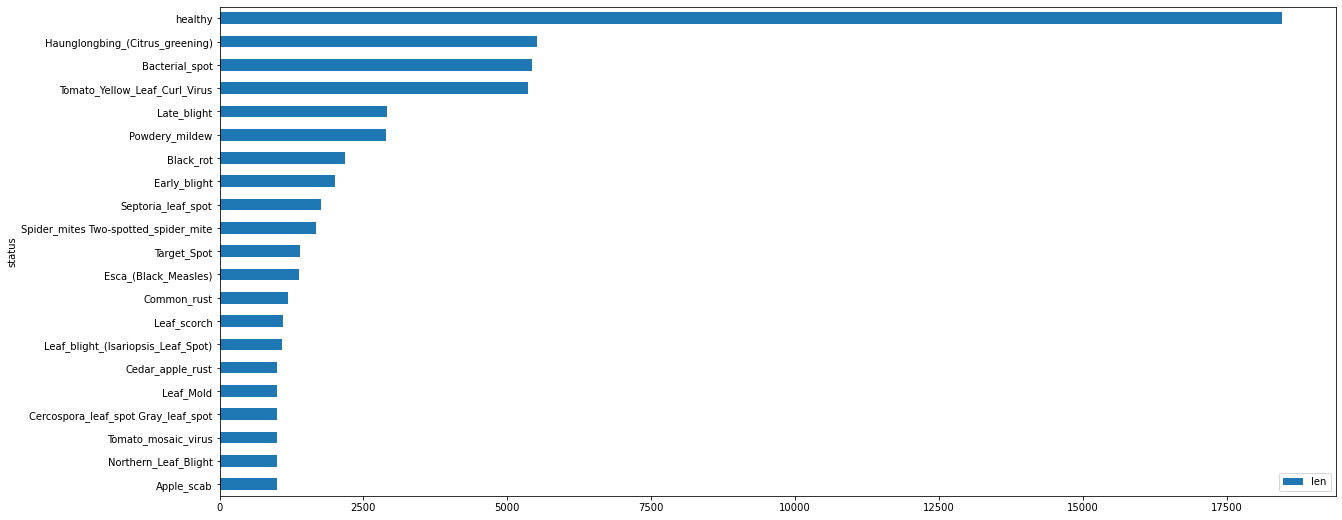

In [74]:
groups = df.groupby(['status']).sum().sort_values(by=['len'])
groups.plot.barh( y='len', use_index=True)